In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import sys 

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('linkeding-data.csv')

In [7]:
data = df.drop('Unnamed: 2', axis = 1)
data

,Date,Impressions
0,8/5/2023,16
1,8/6/2023,2
2,8/7/2023,2
3,8/8/2023,2
4,8/9/2023,2
...,...,...
85,10/29/2023,5945
86,10/30/2023,9361
87,10/31/2023,7948
88,11/1/2023,7260


In [8]:
data.head()

,Date,Impressions
0,8/5/2023,16
1,8/6/2023,2
2,8/7/2023,2
3,8/8/2023,2
4,8/9/2023,2


In [9]:
# univarite time series
link_data = data[['Date', 'Impressions']]

In [10]:
link_data.head()

,Date,Impressions
0,8/5/2023,16
1,8/6/2023,2
2,8/7/2023,2
3,8/8/2023,2
4,8/9/2023,2


In [11]:
link_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         90 non-null     object
 1   Impressions  90 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [12]:
# chinging the date into datetime 
link_data['Date'] = pd.to_datetime(link_data['Date'])

In [13]:
# now checking the info()
link_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         90 non-null     datetime64[ns]
 1   Impressions  90 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [14]:
link_data.head(2)

,Date,Impressions
0,2023-08-05,16
1,2023-08-06,2


In [15]:
# setting the date into index 
link_data = link_data.set_index('Date')

In [16]:
link_data

,Impressions
Date,
2023-08-05,16
2023-08-06,2
2023-08-07,2
2023-08-08,2
2023-08-09,2
...,...
2023-10-29,5945
2023-10-30,9361
2023-10-31,7948


# Observations:
 why we are converting date column as a index column
 -  i can easily retrive the data
-  visulization is also simple
-  those lib has been degine in such a way it required date column as a index(scipy statsmodel)

In [17]:
link_data.head()

,Impressions
Date,
2023-08-05,16
2023-08-06,2
2023-08-07,2
2023-08-08,2
2023-08-09,2


# EDA

In [18]:
link_data.describe()

,Impressions
count,90.000000
mean,3370.411111
std,3306.303846
min,0.000000
25%,963.000000
50%,2610.500000
75%,4488.000000
max,16552.000000


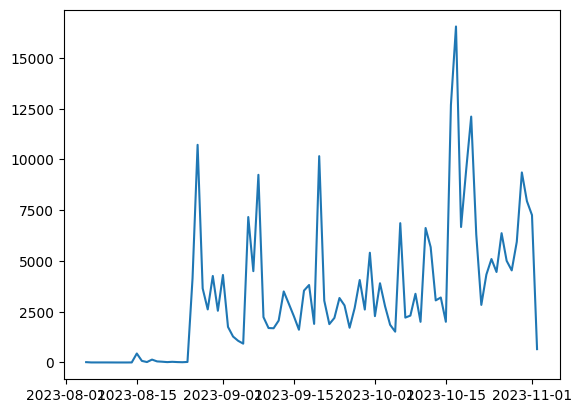

In [20]:
# now plot the linkedin data
plt.plot(link_data.Impressions)

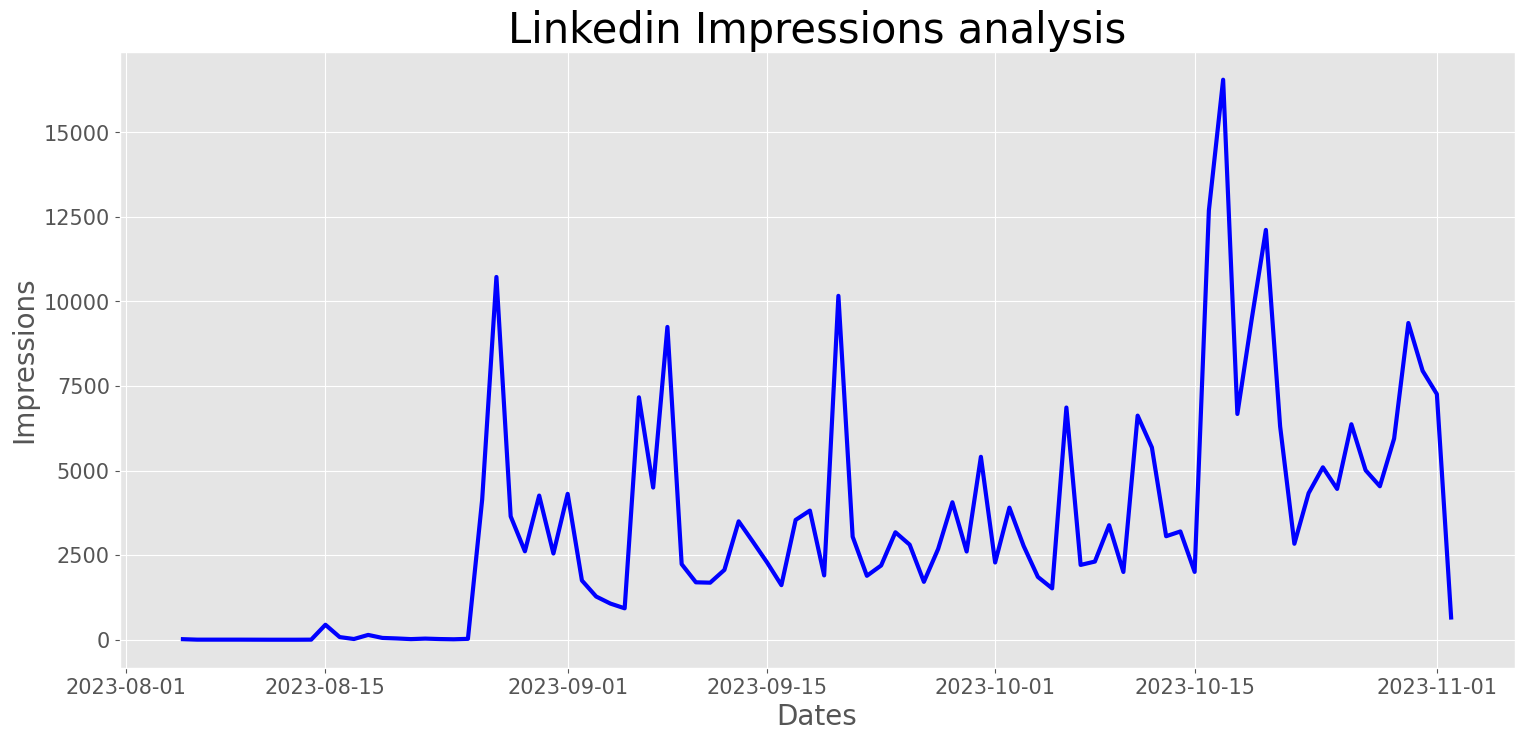

In [21]:
# making plot  more readable

## ploting imprression 
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize= (20))
plt.xticks(fontsize = 15)
plt.ylabel('Impressions', fontsize = 20)
plt.yticks(fontsize= 15)
plt.plot(link_data['Impressions'], linewidth = 3, color = 'blue')
plt.title('Linkedin Impressions analysis', fontsize= 30 )
plt.show()

(array([27., 28., 14.,  7.,  6.,  3.,  2.,  2.,  0.,  1.]),
 array([    0. ,  1655.2,  3310.4,  4965.6,  6620.8,  8276. ,  9931.2,
        11586.4, 13241.6, 14896.8, 16552. ]),
 <BarContainer object of 10 artists>)

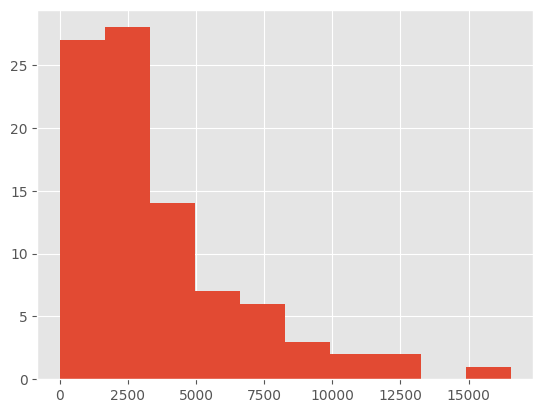

In [22]:
# showing this  imp. data into histogram
plt.hist(link_data.Impressions)

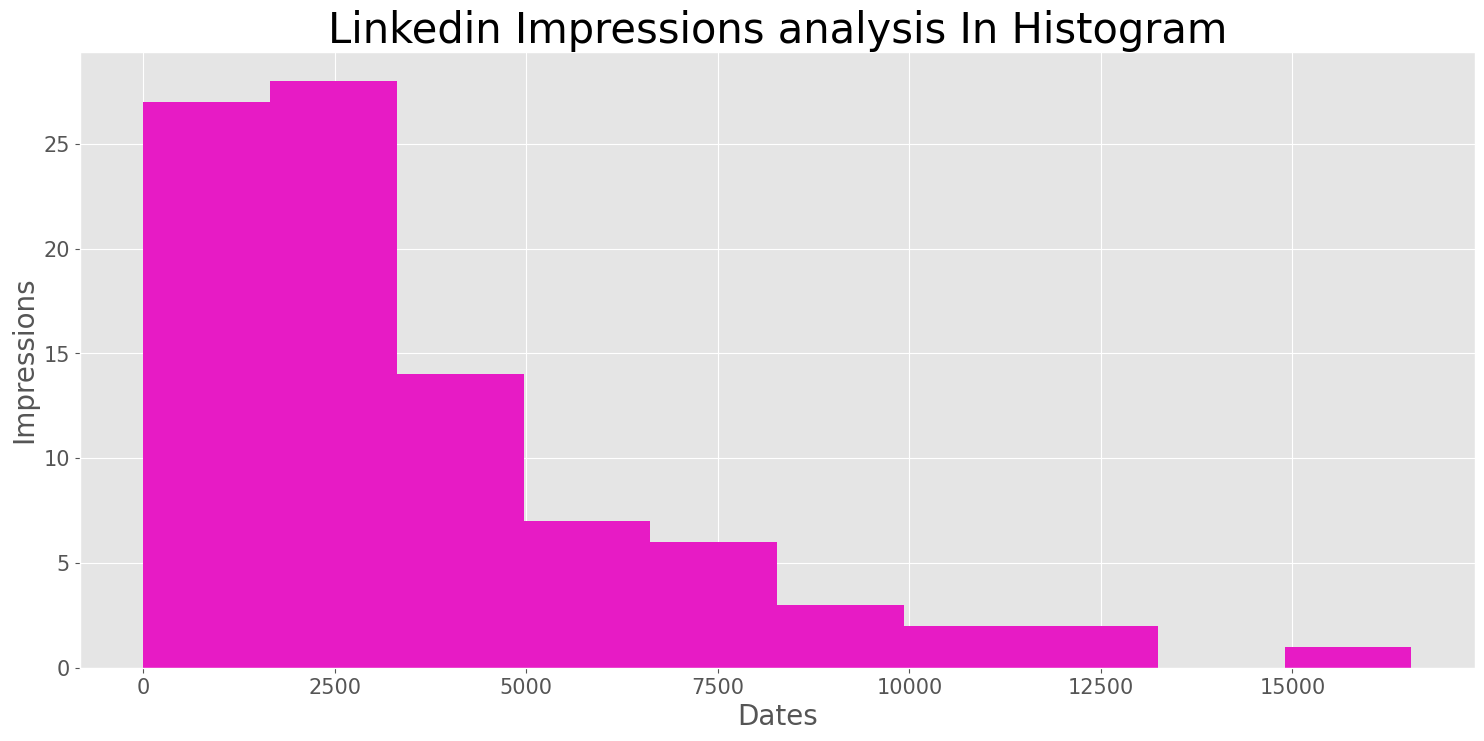

In [25]:
# making histogram more readable 

#loting impressions data
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Impressions' , fontsize = 20)
plt.yticks(fontsize = 15)
plt.hist(link_data['Impressions'], linewidth = 3, color = '#E71BC5')
plt.title('Linkedin Impressions analysis In Histogram', fontsize = 30)
plt.show()


<Axes: xlabel='Impressions', ylabel='Density'>

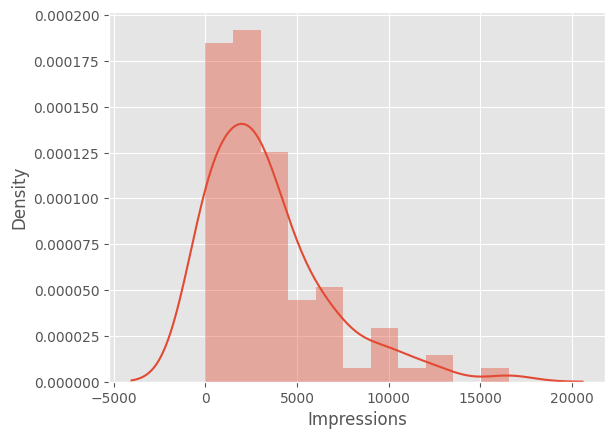

In [26]:
# showing in distplot 
import seaborn as sns 
sns.distplot(link_data.Impressions)

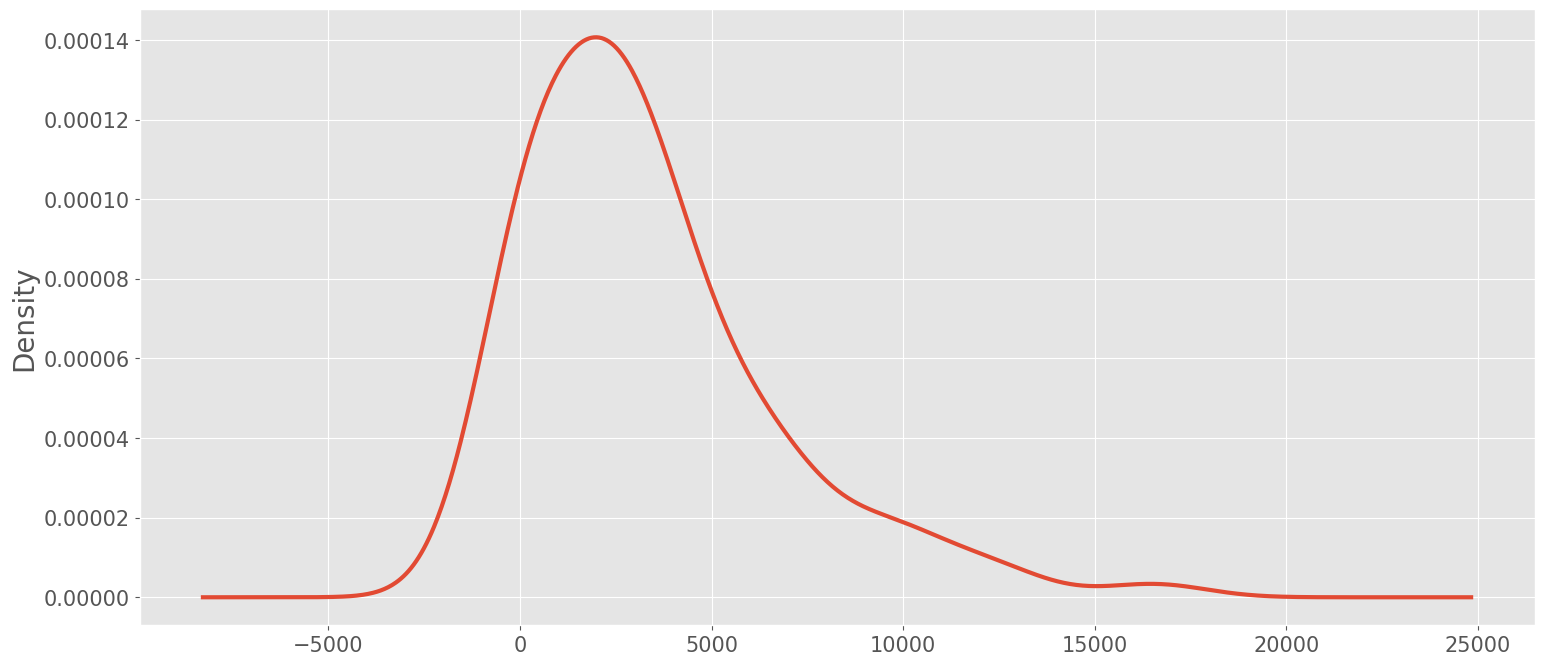

In [27]:
# Distribution of the Impression
df_imp = link_data['Impressions']
df_imp.plot(kind='kde',figsize = (18,8), linewidth= 3)
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [28]:
## Plot the rolling mean and rolling standard deviation of the time series data
link_data['Impressions']

Date
2023-08-05      16
2023-08-06       2
2023-08-07       2
2023-08-08       2
2023-08-09       2
              ... 
2023-10-29    5945
2023-10-30    9361
2023-10-31    7948
2023-11-01    7260
2023-11-02     657
Name: Impressions, Length: 90, dtype: int64

In [50]:
# rolling mean
link_data['Impressions'].rolling(12)

Rolling [window=12,center=False,axis=0,method=single]

In [51]:
# check the rolling mean
rolmean = link_data['Impressions'].rolling(12).mean()
rolmean

Date
2023-08-05            NaN
2023-08-06            NaN
2023-08-07            NaN
2023-08-08            NaN
2023-08-09            NaN
                 ...     
2023-10-29    6094.250000
2023-10-30    6318.250000
2023-10-31    6192.250000
2023-11-01    5787.833333
2023-11-02    5317.166667
Name: Impressions, Length: 90, dtype: float64

In [52]:
# check the rolling standard deviation
rolstd = link_data['Impressions'].rolling(12).std()
rolstd

Date
2023-08-05            NaN
2023-08-06            NaN
2023-08-07            NaN
2023-08-08            NaN
2023-08-09            NaN
                 ...     
2023-10-29    2505.083092
2023-10-30    2675.893160
2023-10-31    2547.002271
2023-11-01    1795.995588
2023-11-02    2313.621044
Name: Impressions, Length: 90, dtype: float64

# Ploting Before smothning 

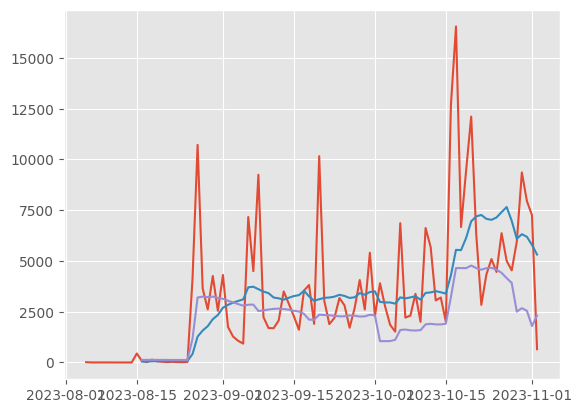

In [53]:
# now plot those values
plt.plot(link_data.Impressions)   ##time series data
plt.plot(rolmean)   ## rolling mean
plt.plot(rolstd)      ## rolling std

# plotting After smothning

In [54]:

rolmean = link_data['Impressions'].rolling(45).mean()  ## smoothning by changing the rolling mean values

rolstd = link_data['Impressions'].rolling(45).std()    ## smothning by changing the rolling standard deviation values

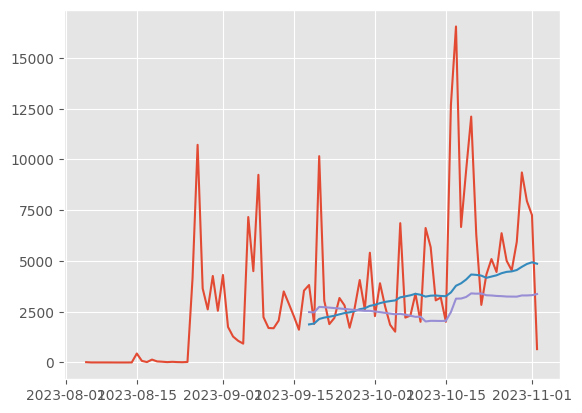

In [55]:
# now plot those values after smothining
plt.plot(link_data.Impressions)   ##time series data
plt.plot(rolmean)   ## rolling mean
plt.plot(rolstd)      ## rolling std

# Stationarity check

In [56]:
# importing the adfuller for checking the stationarity
from statsmodels.tsa.stattools import adfuller
adft = adfuller(link_data.Impressions)

In [57]:
adft

(-4.9696966658636175,
 2.5470902419346103e-05,
 0,
 89,
 {'1%': -3.506057133647011,
  '5%': -2.8946066061911946,
  '10%': -2.5844100201994697},
 1447.2150710908513)

In [58]:
adft[0:4]

(-4.9696966658636175, 2.5470902419346103e-05, 0, 89)

In [59]:
## indexing on adft values
pd.Series(adft[0:4], index= ['test stats', 'P-value', 'lag', 'data points'])

test stats     -4.969697
P-value         0.000025
lag             0.000000
data points    89.000000
dtype: float64

## make a criteria for the p-value
null hypothesis = data is non stationary

P-value= 0.000025

p < 0.000025

reject null hypothesis

p > 0.000025

accept null hypothesis

In [60]:
# creating a function where all stationarity details shuould be present

#Test for staionarity
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # rolling mean
    rolstd = timeseries.rolling(12).std() # rolling standard deviation
    
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

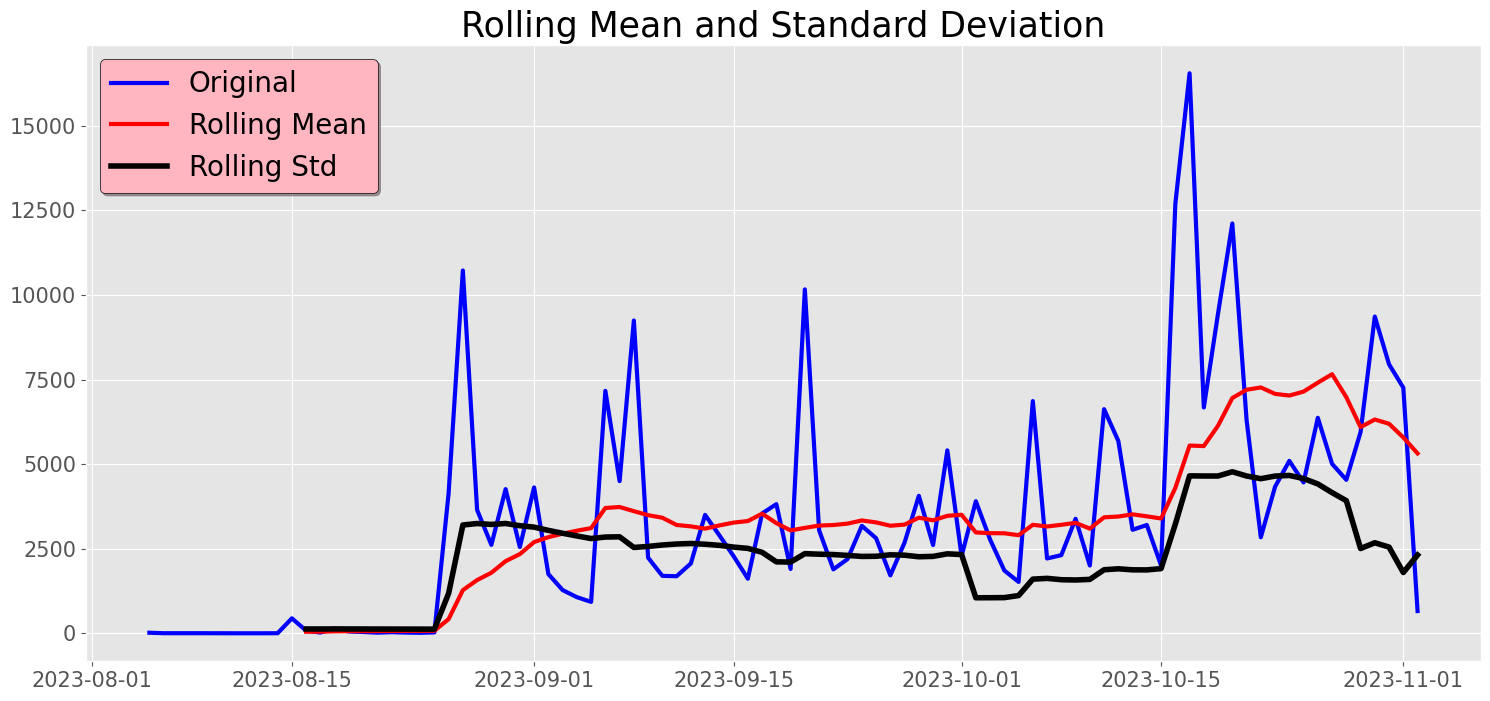

Results of dickey fuller test
Test Statistics                -4.969697
p-value                         0.000025
No. of lags used                0.000000
Number of observations used    89.000000
critical value (1%)            -3.506057
critical value (5%)            -2.894607
critical value (10%)           -2.584410
dtype: float64


In [61]:
test_stationarity(link_data.Impressions)

In [63]:
 ## smothning on linkedin data 
    
# creating a function where all stationarity details shuould be present

#Test for staionarity
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

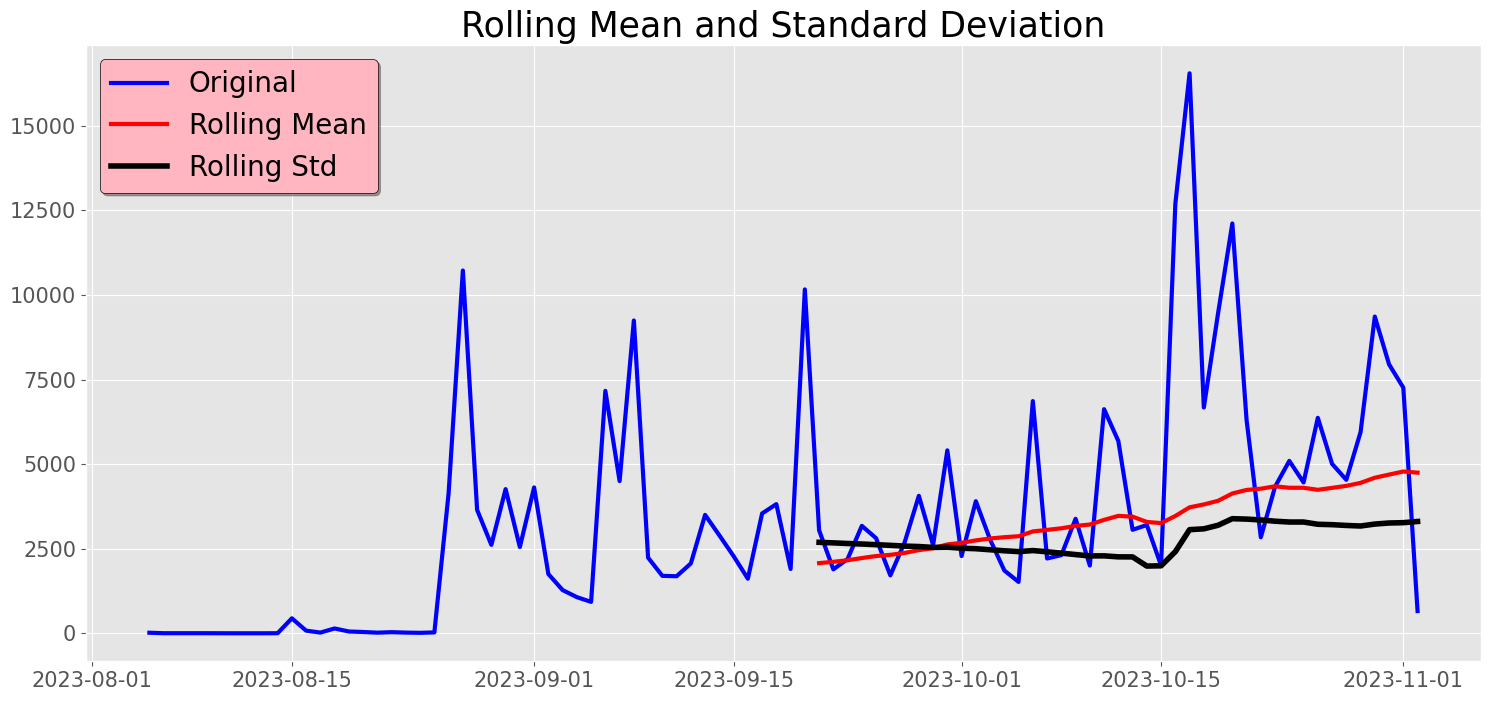

Results of dickey fuller test
Test Statistics                -4.969697
p-value                         0.000025
No. of lags used                0.000000
Number of observations used    89.000000
critical value (1%)            -3.506057
critical value (5%)            -2.894607
critical value (10%)           -2.584410
dtype: float64


In [64]:
test_stationarity(link_data.Impressions)

# Time series Decomposition

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(link_data[['Impressions']], period= 12)
result

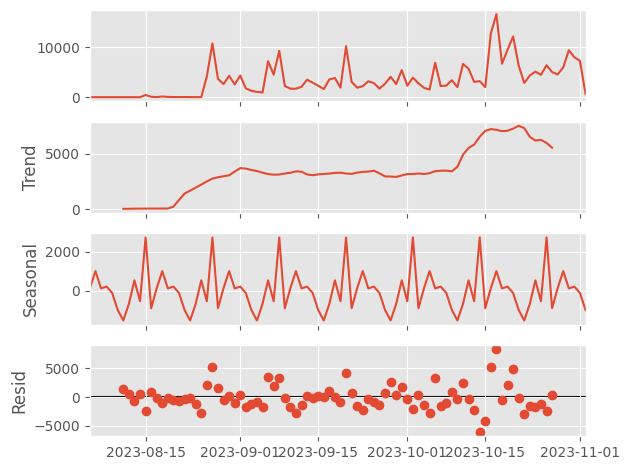

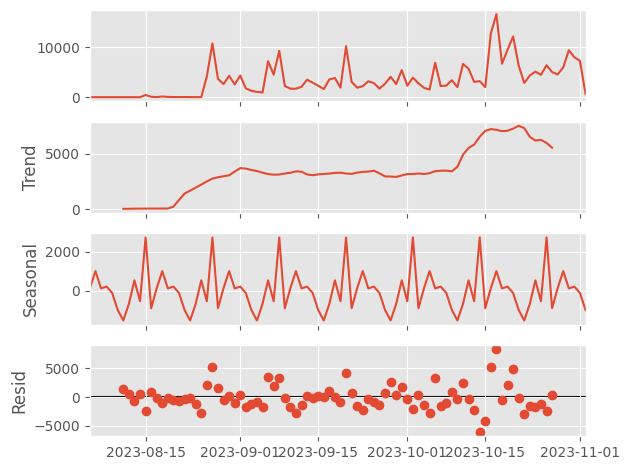

In [67]:
# plot the result 
result.plot()

# Observation 
-  Here we got two plot: one for additive and second for multiplicative, we can go with one also but defolt this
go will both perametter, we can chage it with our conviniant.

-  And we also check seperatly the trend, seasonl, resid values with graph 

# ACF AND PACF

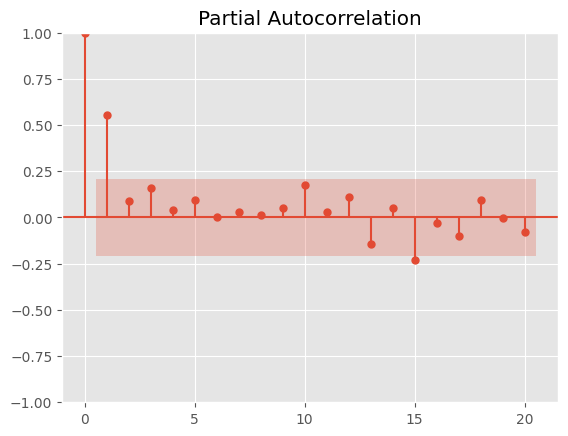

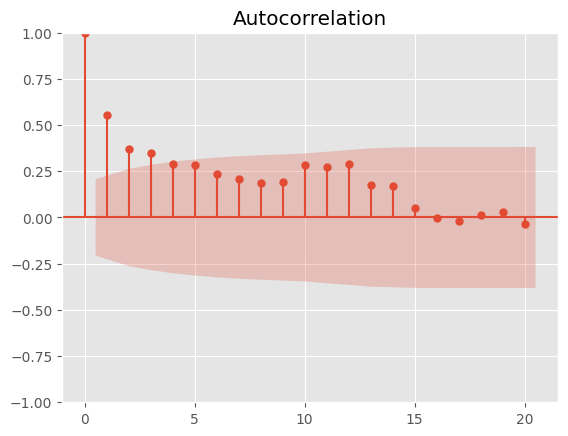

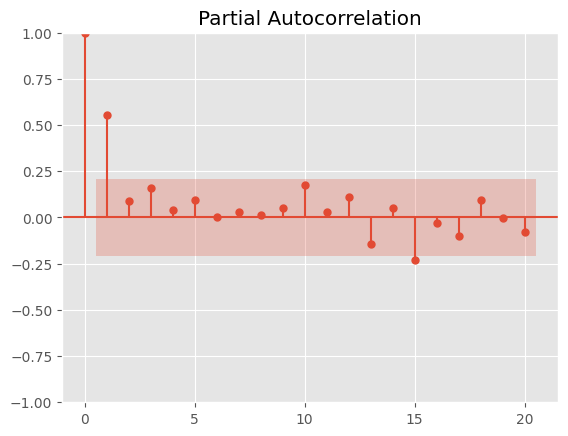

In [68]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(link_data.Impressions)
plot_pacf(link_data.Impressions)

# Preprocessing of the data

- 1. fill the miss(here not required)

- 2. convert data into stationary time series

- 3. if necessary then normalize the data(here not required)

- 4. split the data into train and test

- 5. clean the data by removing the outlier

In [105]:
# non stationary to stationary 
df_imp = link_data['Impressions']
df_imp

Date
2023-08-05      16
2023-08-06       2
2023-08-07       2
2023-08-08       2
2023-08-09       2
              ... 
2023-10-29    5945
2023-10-30    9361
2023-10-31    7948
2023-11-01    7260
2023-11-02     657
Name: Impressions, Length: 90, dtype: int64

In [106]:
df_imp.diff(2)      ## changing values in diff

Date
2023-08-05       NaN
2023-08-06       NaN
2023-08-07     -14.0
2023-08-08       0.0
2023-08-09       0.0
               ...  
2023-10-29     937.0
2023-10-30    4825.0
2023-10-31    2003.0
2023-11-01   -2101.0
2023-11-02   -7291.0
Name: Impressions, Length: 90, dtype: float64

In [107]:
df_imp = df_imp.diff()
df_imp = df_imp.dropna()

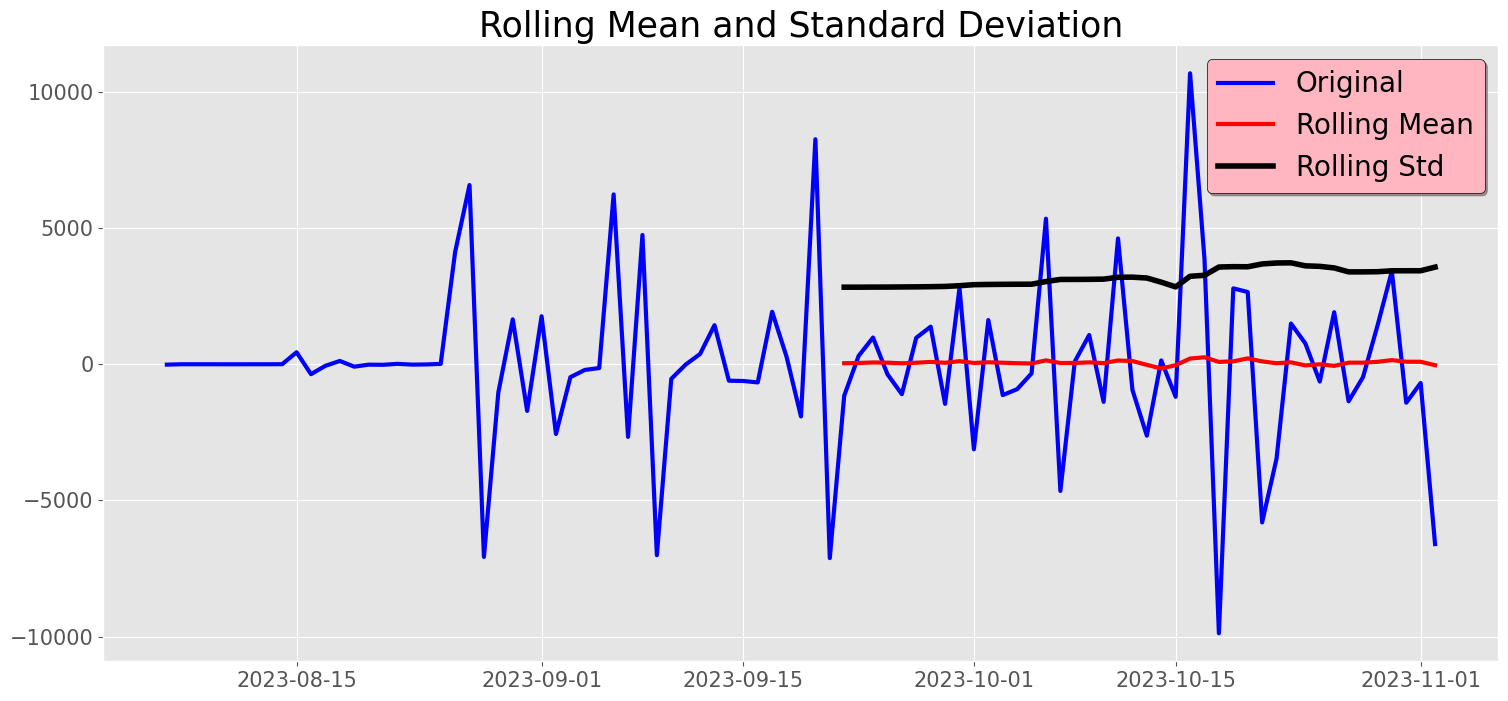

Results of dickey fuller test
Test Statistics               -6.878946e+00
p-value                        1.450083e-09
No. of lags used               3.000000e+00
Number of observations used    8.500000e+01
critical value (1%)           -3.509736e+00
critical value (5%)           -2.896195e+00
critical value (10%)          -2.585258e+00
dtype: float64


In [108]:
# now passing df-imp data into test-stationary function 
test_stationarity(df_imp)

In [109]:
# train test split our data
df_imp[0:-20]   ##training data

Date
2023-08-06     -14.0
2023-08-07       0.0
2023-08-08       0.0
2023-08-09       0.0
2023-08-10      -1.0
               ...  
2023-10-09    1074.0
2023-10-10   -1381.0
2023-10-11    4621.0
2023-10-12    -941.0
2023-10-13   -2624.0
Name: Impressions, Length: 69, dtype: float64

In [110]:
df_imp[-20:]   ##testing data

Date
2023-10-14      141.0
2023-10-15    -1195.0
2023-10-16    10685.0
2023-10-17     3862.0
2023-10-18    -9879.0
2023-10-19     2787.0
2023-10-20     2653.0
2023-10-21    -5808.0
2023-10-22    -3468.0
2023-10-23     1495.0
2023-10-24      763.0
2023-10-25     -637.0
2023-10-26     1911.0
2023-10-27    -1361.0
2023-10-28     -472.0
2023-10-29     1409.0
2023-10-30     3416.0
2023-10-31    -1413.0
2023-11-01     -688.0
2023-11-02    -6603.0
Name: Impressions, dtype: float64

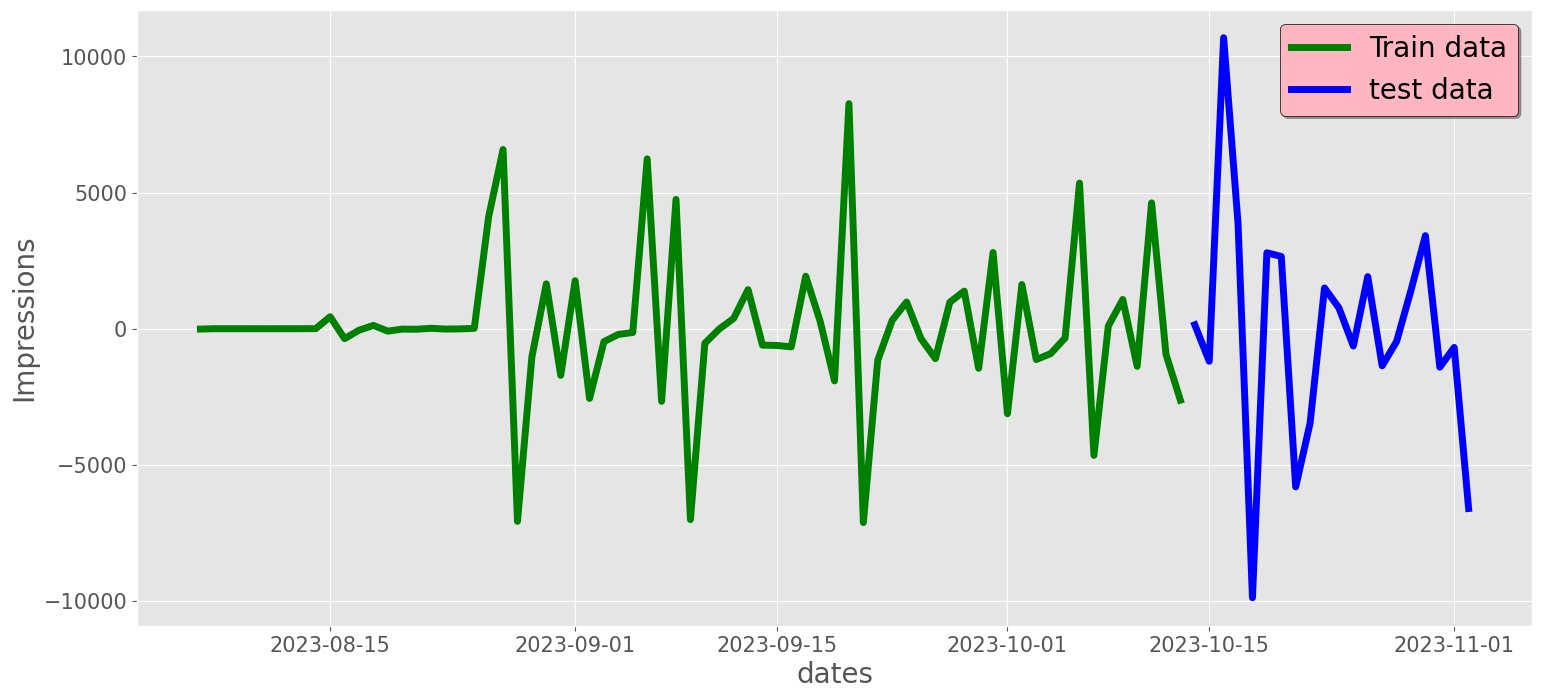

In [111]:
##ploting the train test splited data into graph

# split data into train and testing data
train_data = df_imp[0:-20]
test_data = df_imp[-20:] 
plt.figure(figsize= (18,8))
plt.grid(True)
plt.xlabel('dates', fontsize = 20 )
plt.ylabel('Impressions', fontsize = 20)
plt.xticks(fontsize = 15 )
plt.yticks(fontsize = 15 )
plt.plot(train_data, 'green', label = 'Train data', linewidth = 5)
plt.plot(test_data, 'blue', label = 'test data', linewidth = 5)
plt.legend(fontsize = 20, shadow = True, facecolor = 'lightpink', edgecolor = 'k')

# Model Building 

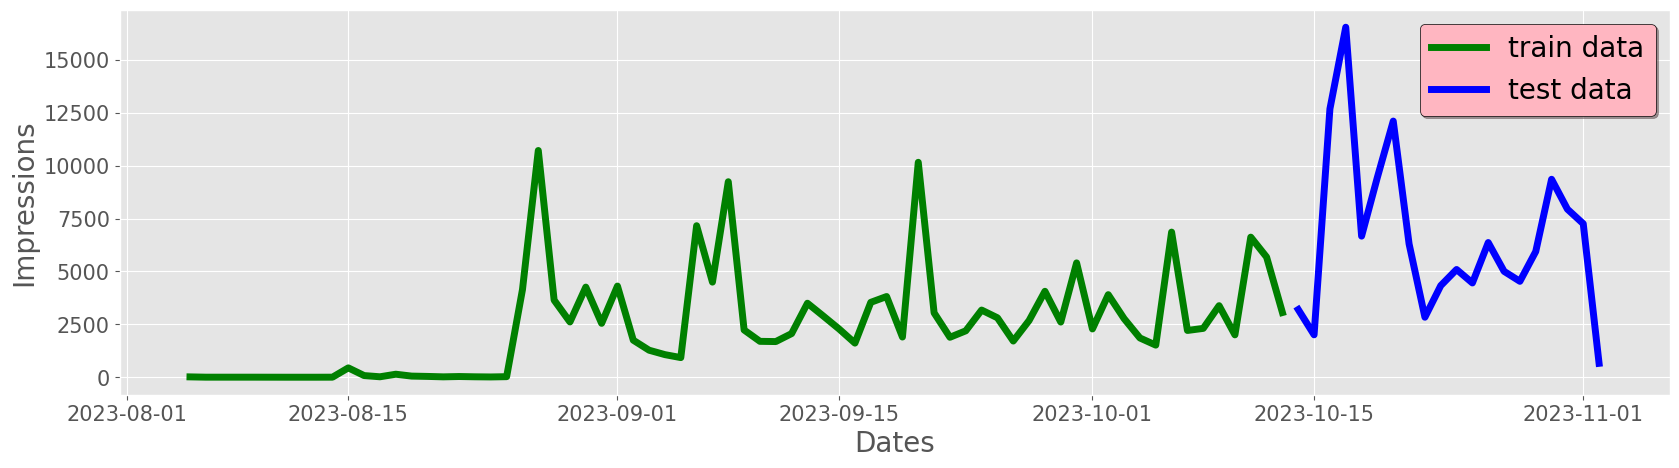

In [113]:
train_data = link_data['Impressions'][0:-20]       ##train data
test_data = link_data['Impressions'][-20:]           ## testing data
plt.figure(figsize=(20,5))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Impressions', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot(train_data, 'green', label = 'train data', linewidth = 5)
plt.plot(test_data, 'blue', label = 'test data', linewidth = 5)
plt.legend(fontsize = 20, shadow = True, facecolor = 'lightpink', edgecolor = 'k')

In [114]:
link_data['Impressions']

Date
2023-08-05      16
2023-08-06       2
2023-08-07       2
2023-08-08       2
2023-08-09       2
              ... 
2023-10-29    5945
2023-10-30    9361
2023-10-31    7948
2023-11-01    7260
2023-11-02     657
Name: Impressions, Length: 90, dtype: int64

In [116]:
90-20  ## 0-->70 == training data, 71-->90 == testing data

70

In [117]:
# importing the libraries 
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [118]:
history = [x for x in train_data]

In [119]:
# passing train data into the arima model
model = ARIMA(history, order= (1,1,1) )  ## p,d,q Values == lags values

In [120]:
model = model.fit()  # fitting the model

In [121]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   70
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -628.313
Date:                Thu, 02 Nov 2023   AIC                           1262.626
Time:                        10:45:36   BIC                           1269.328
Sample:                             0   HQIC                          1265.285
                                 - 70                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1687      0.144      1.171      0.242      -0.114       0.451
ma.L1         -0.8650      0.098     -8.855      0.000      -1.056      -0.674
sigma2      4.704e+06   4.68e+05     10.045      0.000    3.79e+06    5.62e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               134.01
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                             2.17
Prob(H) (two-sided):                  0.28   Kurtosis:                         8.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Now we want to Forecast the Next values

In [122]:
model.forecast()

array([3559.26680269])

In [123]:
# getting the MSE values
mean_squared_error([test_data[0]], model.forecast())

129072.63551700041

In [124]:
## geting the RMSE value 
np.sqrt(mean_squared_error([test_data[0]], model.forecast()))

359.26680269265125

In [125]:
def train_arima_model(X, y, arima_order):
    history = [x for x in X]  ## prepare training dataset
    predictions = list()     ## make prediction list

    for t in range(len(y)):
        model  = ARIMA(history, order= arima_order)
        model_fit = model.fit()
        yhat  = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])

    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [126]:
## evaluate different combinations of p,d,q values for an ARIMA model to get the best order for ARIMA model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE= %.3f'  %(order, rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE= %.3f'  %(best_cfg, best_score))

In [127]:
import warnings
warnings.filterwarnings('ignore')

p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)

evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE= 5331.039
ARIMA(0, 0, 1) RMSE= 4439.787
ARIMA(0, 0, 2) RMSE= 4531.453
ARIMA(0, 1, 0) RMSE= 4227.093
ARIMA(0, 1, 1) RMSE= 4335.654
ARIMA(0, 1, 2) RMSE= 4106.101
ARIMA(0, 2, 0) RMSE= 6061.999
ARIMA(0, 2, 1) RMSE= 4255.287
ARIMA(0, 2, 2) RMSE= 4380.190
ARIMA(1, 0, 0) RMSE= 4208.502
ARIMA(1, 0, 1) RMSE= 4404.165
ARIMA(1, 0, 2) RMSE= 4135.030
ARIMA(1, 1, 0) RMSE= 4445.038
ARIMA(1, 1, 1) RMSE= 4139.618
ARIMA(1, 1, 2) RMSE= 4137.971
ARIMA(1, 2, 0) RMSE= 6052.286
ARIMA(1, 2, 1) RMSE= 4467.387
ARIMA(1, 2, 2) RMSE= 4154.802
ARIMA(2, 0, 0) RMSE= 4329.179
ARIMA(2, 0, 1) RMSE= 4167.188
ARIMA(2, 0, 2) RMSE= 4196.435
ARIMA(2, 1, 0) RMSE= 4253.543
ARIMA(2, 1, 1) RMSE= 4177.645
ARIMA(2, 1, 2) RMSE= 4139.422
ARIMA(2, 2, 0) RMSE= 5309.065
ARIMA(2, 2, 1) RMSE= 4281.882
ARIMA(2, 2, 2) RMSE= 4480.580
Best ARIMA(0, 1, 2) RMSE= 4106.101


In [128]:
# now with best arima values create our final model
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(0,1,2))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of ARIMA Model: 4106.101413964531


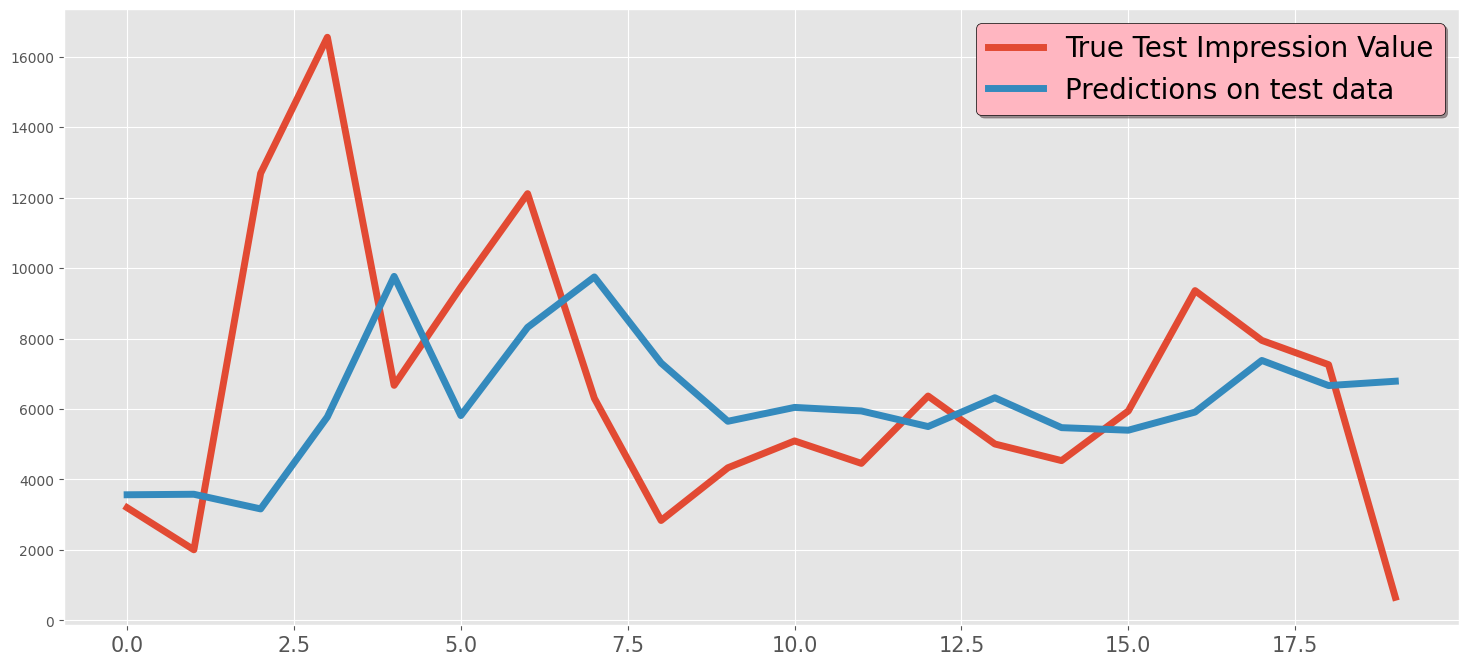

In [129]:
## now ploting the predicted data 

plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Impression Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [130]:
## now converted forecast values into series
fc_series = pd.Series(predictions, index= test_data.index)

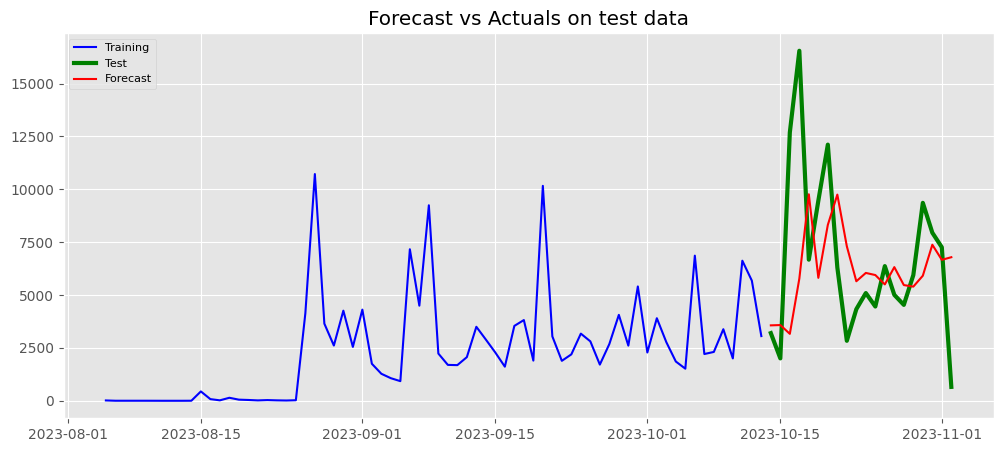

In [131]:
# now plot the fc-series
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

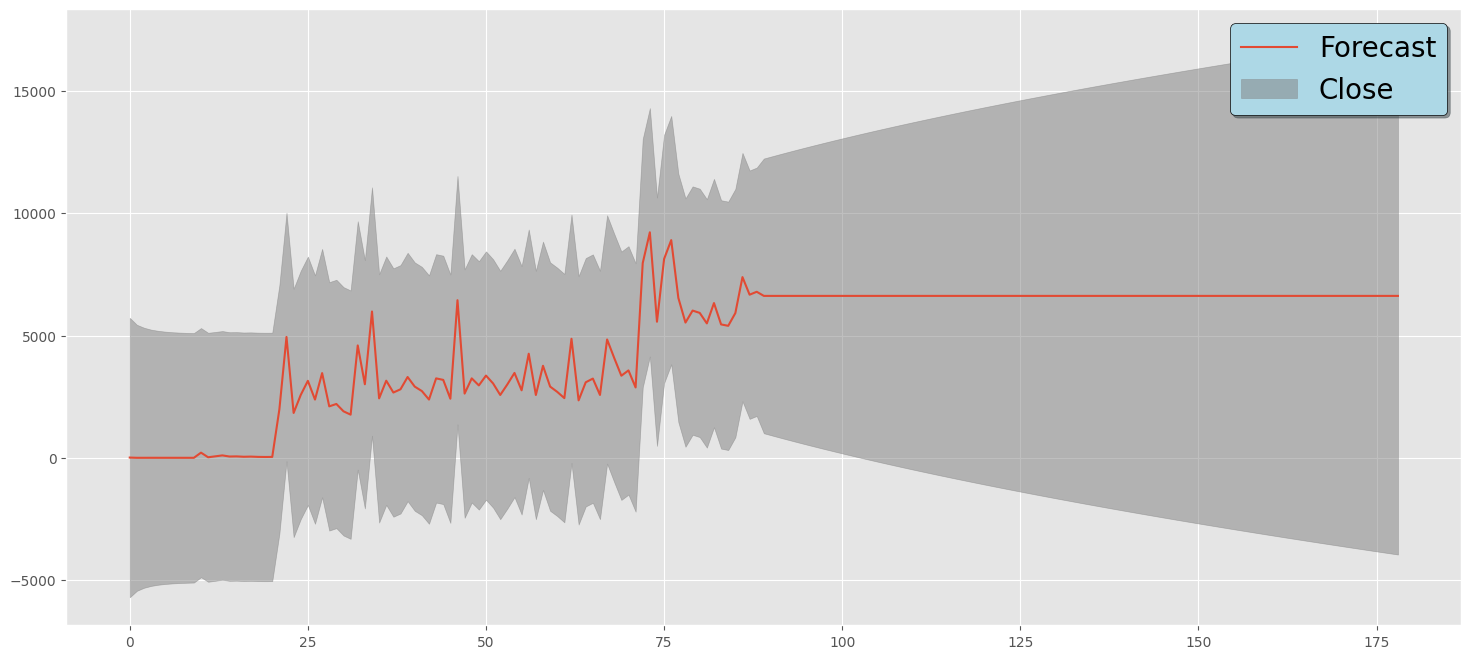

In [132]:
## now ploting  forecaset the next 90 days future values in the plot 
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit,start=1, end=len(df_imp)+90, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

# SARIMA

In [133]:
# evaluate parameters for sarimax 
import warnings
warnings.filterwarnings('ignore')

history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 4170.233329573555


ValueError: x and y must have same first dimension, but have shapes (30,) and (20, 1)

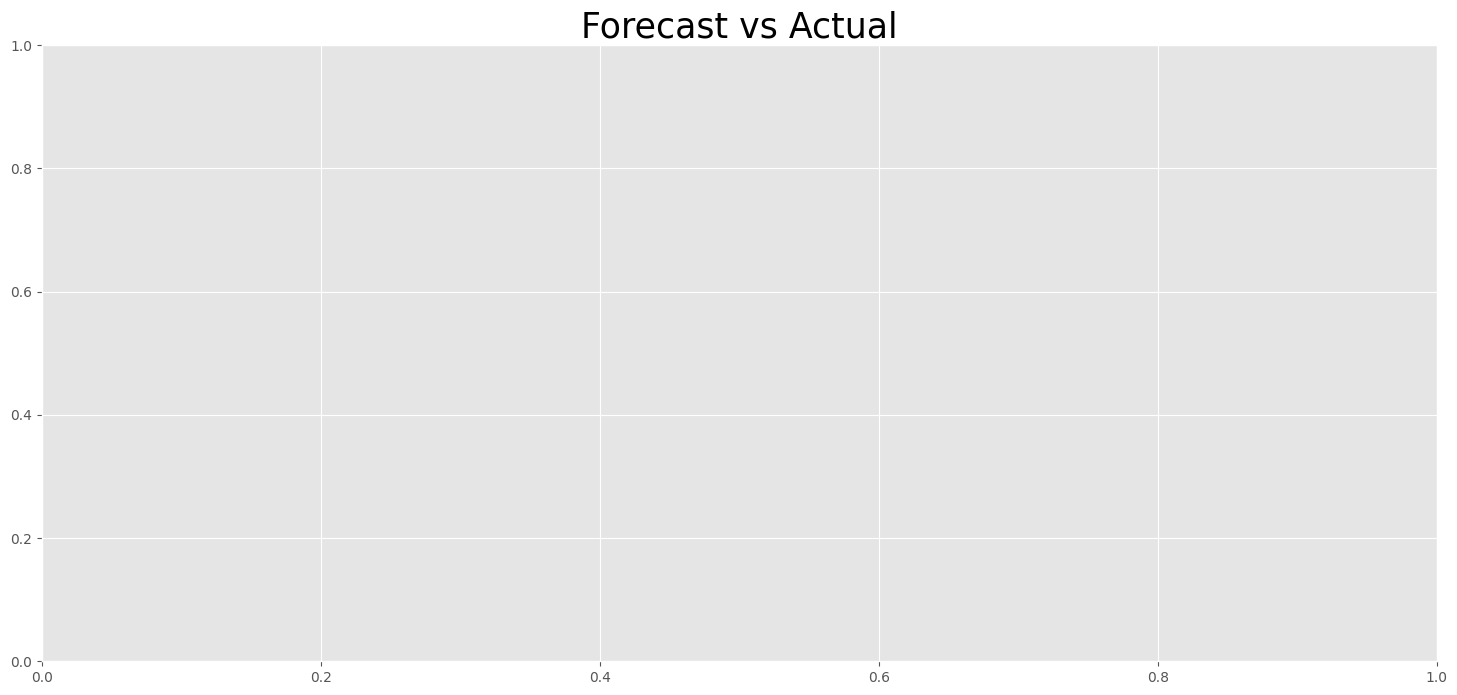

In [136]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(20), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(30), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')